In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random as rng

rng.seed(12345)

In [2]:
# Read the image
im = cv.imread("/Users/alexwei/Desktop/Screenshot 2023-10-25 at 8.30.08 PM.png")
# im = cv.imread("/Users/alexwei/Downloads/IM_25372.JPG")

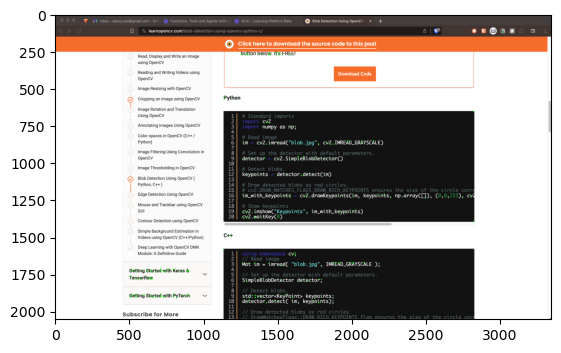

(<matplotlib.image.AxesImage at 0x123065190>, None)

In [3]:
# Feature detection don't work so good
# Set up the detector with default parameters
detector = cv.ORB_create()

# Detect blobs
kps, des = detector.detectAndCompute(im, None)

# # Draw blobs as circles
kp_im = cv.drawKeypoints(im, kps, None, color=(0, 255, 0))

plt.imshow(kp_im), plt.show()

Try bounding box on contours

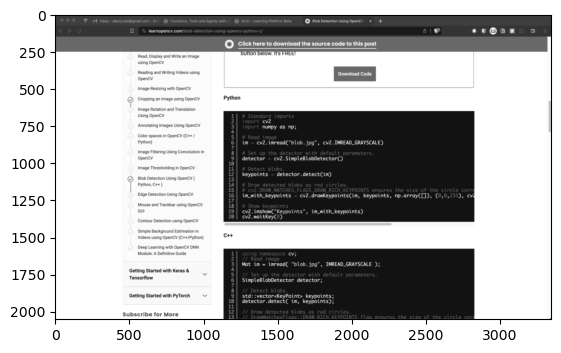

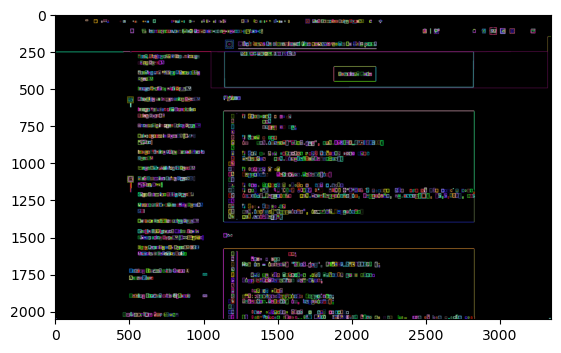

(<matplotlib.image.AxesImage at 0x12390fb90>, None)

In [4]:
max_thresh = 255
thresh = 100

# Convert to grayscale and blur
src_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (5, 5))

# Detect edges using Canny
canny_output = cv.Canny(src_gray, thresh, thresh*2)

# Find contours
contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None] * len(contours)
boundRect = [None] * len(contours)
centers = [None] * len(contours)
radius = [None] * len(contours)

for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

# Draw
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)


# Draw polygonal contour + bounding rects + circles
for i in range(len(contours)):
    color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))
    cv.drawContours(drawing, contours_poly, i, color)
    pt1 = (int(boundRect[i][0]), int(boundRect[i][1]))
    pt2 = (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] + boundRect[i][3]))
    cv.rectangle(drawing, pt1, pt2, color, 2)
    # cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

plt.imshow(src_gray, cmap="gray"), plt.show()
plt.imshow(drawing), plt.show()

# Blob detector

In [31]:
im = cv.imread("/Users/alexwei/Desktop/Screenshot 2023-10-25 at 8.30.08 PM.png", cv.IMREAD_GRAYSCALE)
# im = cv.imread("/Users/alexwei/Downloads/IM_25372.JPG", cv.IMREAD_GRAYSCALE)
im = cv.blur(im, (10, 10))

detector = cv.SimpleBlobDetector_create()

In [32]:
kps = detector.detect(im)

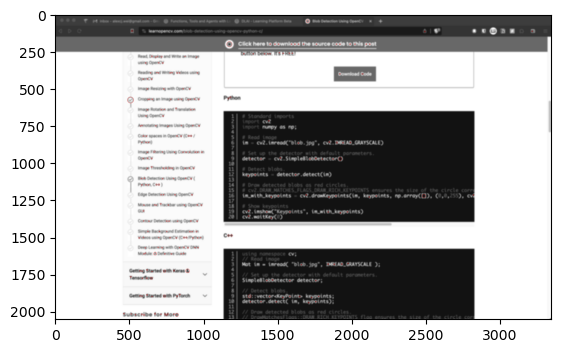

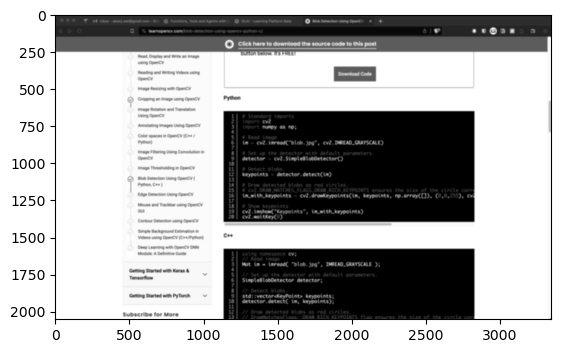

(<matplotlib.image.AxesImage at 0x12b735090>, None)

In [36]:
im_w_kps = cv.drawKeypoints(im, kps, None, (255, 0, 0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_w_kps), plt.show()